# KMTNet Depth Statistics

In [1]:
import glob, os
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import time

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [3]:
filterlist = ['B', 'V', 'R', 'I']

#obsname ra dec dateobs filter exptime jd sky fwhm elong zp zperr ul5

In [4]:
intbl = ascii.read('../3.table/kmtnet/ks4_ul5.log')
ncols = ['obsname', 'ra', 'dec', 'dateobs', 'timeobs', 'filter', 'exptime', 'jd', 'sky', 'elong', 'ellip', 'zp', 'zperr', 'ul5',]
for key, nkey in zip(intbl.keys(), ncols):
	if intbl[key].dtype == 'float64':
		intbl[key].format = '1.3f'
	intbl.rename_column(key, nkey)
#
satbl = intbl[intbl['obsname']=='SAAO']
sstbl = intbl[intbl['obsname']=='SSO']
cttbl = intbl[intbl['obsname']=='CTIO']

print(f"KMTNet\nSAAO : {len(satbl)}\nSSO  : {len(sstbl)}\nCTIO : {len(cttbl)}\nTOTAL: {len(intbl)}")

KMTNet
SAAO : 8765
SSO  : 3187
CTIO : 4669
TOTAL: 16621


In [5]:
tablelist = []

In [6]:
for obs, obstbl in zip(['SAAO', 'SSO', 'CTIO'], [satbl, sstbl, cttbl]):
	for filte in filterlist:
		indx = np.where(obstbl['filter'] == filte)
		med, std = np.median(obstbl['ul5'][indx]), np.std(obstbl['ul5'][indx])
		print(obs, filte, med, std)

		_ = Table()
		_['obs'] = [obs]
		_['filter'] = filte
		_['ul5_med'] = med
		_['ul5_std'] = std

		tablelist.append(_)
#	Total
obstbl = intbl
for filte in filterlist:
	indx = np.where(obstbl['filter'] == filte)
	med, std = np.median(obstbl['ul5'][indx]), np.std(obstbl['ul5'][indx])
	_ = Table()
	_['obs'] = ['KMTNet']
	_['filter'] = filte
	_['ul5_med'] = med
	_['ul5_std'] = std
	tablelist.append(_)
#	Stack
outbl = vstack(tablelist)

SAAO B 22.06190875 0.28281198586523565
SAAO V 21.854925 0.2633886512656563
SAAO R 22.017142500000002 0.3127001983096665
SAAO I 21.301762500000002 0.24814656348058173
SSO B 22.250185 0.2915386035279665
SSO V 22.1187125 0.32840296412596176
SSO R 22.159777499999997 0.30863123747237015
SSO I 21.474081249999998 0.2554597684853958
CTIO B 22.3273175 0.38934602631339943
CTIO V 22.0499875 0.3395443520512716
CTIO R 22.240335 0.3048090301032878
CTIO I 21.505593750000003 0.22487617624854567


obs,filter,ul5_med,ul5_std
str6,str1,float64,float64
SAAO,B,22.06190875,0.28281198586523565
SAAO,V,21.854925,0.2633886512656563
SAAO,R,22.017142500000002,0.3127001983096665
SAAO,I,21.301762500000002,0.24814656348058173
SSO,B,22.250185,0.2915386035279665
SSO,V,22.1187125,0.32840296412596176
SSO,R,22.159777499999997,0.30863123747237015
SSO,I,21.474081249999998,0.2554597684853958
CTIO,B,22.3273175,0.38934602631339943


In [8]:
outbl['ul5_med'].format = '1.3f'
outbl['ul5_std'].format = '1.3f'
outbl.write('../3.table/kmtnet/kmtnet.depth.fits', format='fits', overwrite=True)
outbl


obs,filter,ul5_med,ul5_std
str6,str1,float64,float64
SAAO,B,22.062,0.283
SAAO,V,21.855,0.263
SAAO,R,22.017,0.313
SAAO,I,21.302,0.248
SSO,B,22.250,0.292
SSO,V,22.119,0.328
SSO,R,22.160,0.309
SSO,I,21.474,0.255
CTIO,B,22.327,0.389


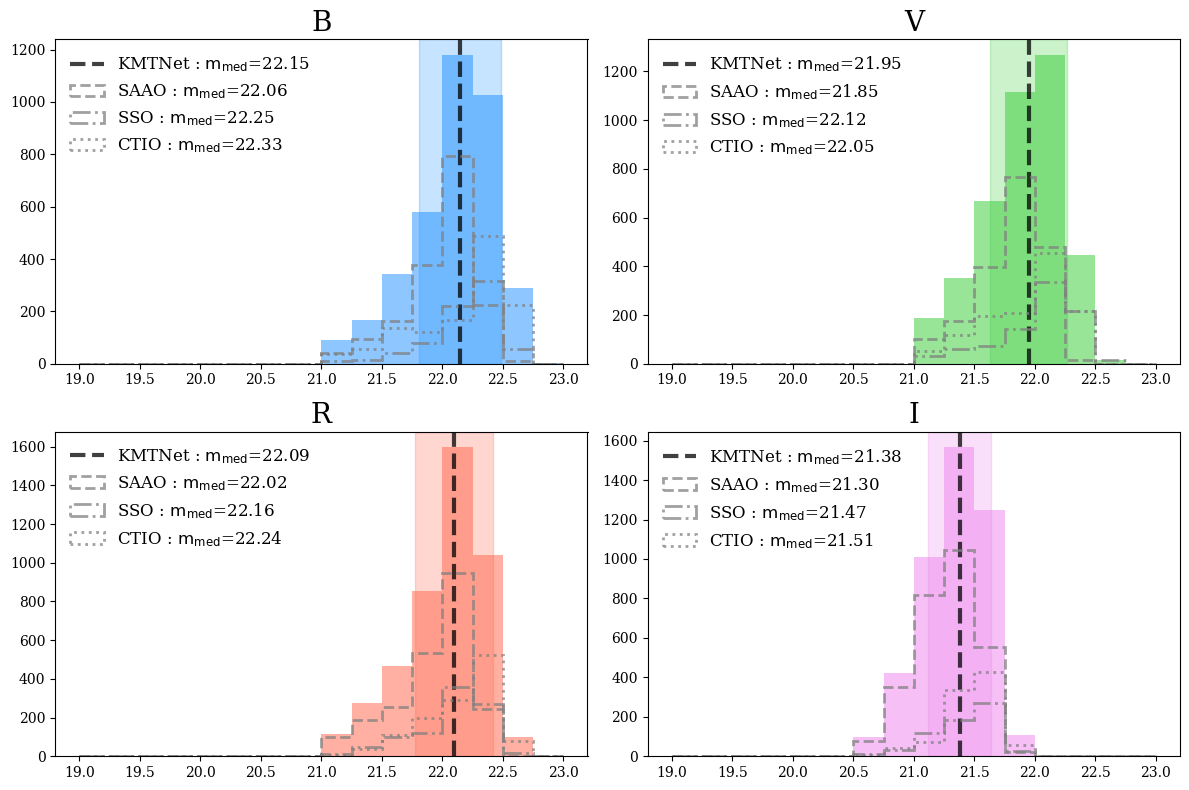

In [9]:
bins = np.arange(19.0, 23+0.25, 0.25)
colors = ['dodgerblue', 'limegreen', 'tomato', 'violet']
fig = plt.figure(figsize=(12, 8))
for ff, (filte, c) in enumerate(zip(filterlist, colors)):
	plt.subplot(2, 2, ff+1)
	plt.title(filte, fontsize=20)
	#	All
	plt.hist(intbl['ul5'][intbl['filter']==filte], bins=bins, color=c, alpha=0.5)
	med = outbl['ul5_med'][(outbl['obs']=='KMTNet') & (outbl['filter']==filte)].item()
	std = outbl['ul5_std'][(outbl['obs']=='KMTNet') & (outbl['filter']==filte)].item()
	plt.axvline(x=med, c='k', ls='--', lw=3, alpha=0.75, label=f"KMTNet : "+r"$\rm m_{med}$"+f"={med:1.2f}")
	plt.axvspan(xmin=med-std, xmax=med+std, color=c, alpha=0.25)
	#	Each obs
	##	SAAO
	samed = outbl['ul5_med'][(outbl['obs']=='SAAO') & (outbl['filter']==filte)].item()
	plt.hist(satbl['ul5'][satbl['filter']==filte], bins=bins, color='grey', ls='--', lw=2, histtype='step', alpha=0.75, label=f"SAAO : "+r"$\rm m_{med}$"+f"={samed:1.2f}")
	##	SSO
	ssmed = outbl['ul5_med'][(outbl['obs']=='SSO') & (outbl['filter']==filte)].item()
	plt.hist(sstbl['ul5'][sstbl['filter']==filte], bins=bins, color='grey', ls='-.', lw=2, histtype='step', alpha=0.75, label=f"SSO : "+r"$\rm m_{med}$"+f"={ssmed:1.2f}")
	##	CTIO
	ctmed = outbl['ul5_med'][(outbl['obs']=='CTIO') & (outbl['filter']==filte)].item()
	plt.hist(cttbl['ul5'][cttbl['filter']==filte], bins=bins, color='grey', ls=':', lw=2, histtype='step', alpha=0.75, label=f"CTIO : "+r"$\rm m_{med}$"+f"={ctmed:1.2f}")

	plt.legend(loc='upper left', fontsize=12, frameon=False)
	# plt.xlabel(r'$\rm 5\sigma$ depth [AB mag]')

plt.tight_layout()
plt.savefig('../4.plot/kmtnet.depth.png')